## Ridge

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
load_dataset = fetch_california_housing()
load_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df = pd.DataFrame(load_dataset.data)
df.columns = load_dataset.feature_names

In [5]:
X = df
y = load_dataset.target

In [6]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
# standardizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
ridge_model = Ridge()
ridge_model

Ridge()

In [13]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80.90]}

In [15]:
ridge_cv = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80.9]},
             scoring='neg_mean_squared_error')

In [16]:
print(ridge_cv.best_params_)

{'alpha': 2}


In [21]:
print(ridge_cv.best_score_)

-0.5257096117486656


In [17]:
ridge_pred = ridge_cv.predict(X_test) 
ridge_pred

array([0.72682905, 1.76704775, 2.71011016, ..., 2.07425024, 1.57403958,
       1.82712846])

In [19]:
ridge_cv.score(X_test,y_test)

-0.5305199627837824

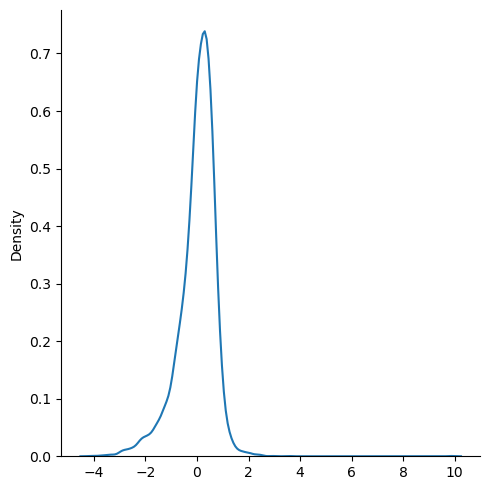

In [22]:
import seaborn as sns
sns.displot(ridge_pred-y_test, kind='kde')

## Lasso 

In [23]:
lasso_model = Lasso()
lasso_cv = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80.9]},
             scoring='neg_mean_squared_error')

In [24]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 1}
-1.339891195287655


In [25]:
lasso_cv.score(X_test,y_test)

-1.3125452673724591

In [26]:
lasso_pred = ridge_cv.predict(X_test) 
lasso_pred

array([0.72682905, 1.76704775, 2.71011016, ..., 2.07425024, 1.57403958,
       1.82712846])

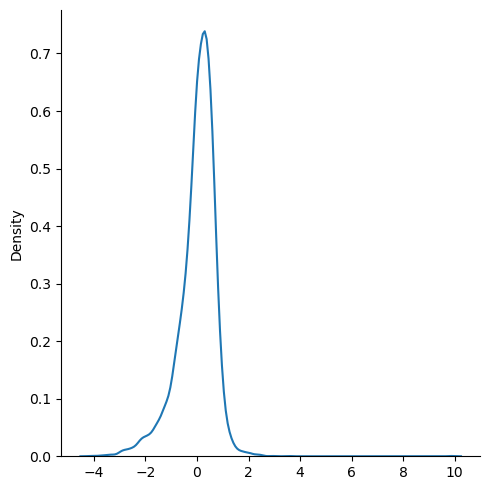

In [27]:
import seaborn as sns
sns.displot(lasso_pred-y_test, kind='kde')

In [28]:
from sklearn.metrics import r2_score
ridge_score= r2_score(ridge_pred,y_test)
ridge_score

0.3446160448206136

In [29]:
lasso_score= r2_score(lasso_pred,y_test)
lasso_score

0.3446160448206136